# Welcome to plotAR

In [1]:
import plotar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import requests
import json

## Iris

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
plotar.plotar(iris.data, iris.target)

In [4]:
plotar.controller(height=500)

Just scan the QR-Code with your mobile device and open the URL - this will open that keyboard in your browser. Tap on the the AR-Icon to step in the Augmented Reality.

What should happen here is, that your mobile device connects to this very Jupyter server! For that to work plotar tries to guess a URL that also works from you mobile: ![Architecture](images/architecture.png)

**Troubleshooting**: If you cannot connect to this server consider the following steps:
* Enable connections from outside by (re-)starting Jupyter: `jupyter lab --ip="*"`
* Try to have your mobile device to be on the same network as your desktop.

**WARNING** Jupyter is secured by default to have a non-guessable token to get some level of security, but still you probably do not use HTTPS, so anybody intercepting the traffic between you mobile device and your desktop can see all your data! This might be ok in your home network or in a company enterprise - be cautious!

Traffic with mybinder.org actually is secured by HTTPS and the token.

## GAPminder

In [5]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gap = pd.read_csv(url)

In [6]:
gap

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [7]:
data_json = plotar.plotar(gap.query("continent=='Europe'"), xyz=['gdpPercap','year','lifeExp'],
              col='country', size='pop', return_data=True)

In [8]:
with open('examples/gapminder.json', 'w') as f:
    json.dump(data_json, f)

## D ONE Team

We scrape the http://d-one.ai/team webpage and extract some features on the team member's description

In [9]:
from bs4 import BeautifulSoup

In [10]:
url = 'https://d-one.ai/team'
res = requests.get(url)

In [11]:
pd.set_option("max_colwidth", 400)

In [12]:
soup = BeautifulSoup(res.text, 'html.parser')
x = soup.find_all("div", class_="details")
team = pd.DataFrame( dict(name=_.find_all('h3')[0].text, text=_.find_all('p')[0].text) for _ in x )
team = team.drop_duplicates('name')
team

,name,text
0,Alexandra Studer,Alexandra received her M.Sc. in Mechanical Engineering from the Swiss Federal Institute of Technology (ETH Zurich) in 2016. Her areas of expertise are data analytics and visualization. Alexandra is with the team since 2017.
1,Dr. Alex Hall,"Alex received his Ph.D. in Computer Science from ETH Zurich in 2003. He was awarded the Medal of the ETH Zurich for his thesis. Afterwards, he held research positions at ETH and at UC Berkeley before joining Google. Among other projects, he has led the implementation of an innovative data-analysis system (full stack from Web-UI to column-store) from scratch. He is currently working as an exter..."
2,Dr. Andrea Abelli,"Andrea holds a B.Sc. and a M.Sc. in Electrical Engineering from the University of Nice Sophia-Antipolis and the Sapienza University in Rome. From the same universities, he holds a Ph.D. in Statistical Learning and Control Theory, and a managerial development program from SDA Bocconi School of Management. After, he held positions at United Technologies, Teralytics, KPMG, Delivery Hero and Swiss..."
3,Dr. Andrej Vckovski,Andrej earned his doctorate at the University of Zurich after studying physics at the Swiss Federal Institute of Technology. He co-founded Netcetera in 1996 and is the group's CEO. He is in the board of directors of D ONE since 2006.
4,Andrey Sluzhivoy,"Andrey holds a diploma with honors in Mathematics and Computer Science from the University of Duisburg-Essen in Germany. His areas of expertise are analytics, data warehousing, and dashboard development. Andrey has been in the team since 2016."
...,...,...
73,Timothy Sondej,Timothy Sondej received his M.Sc. in Cognitive Neuroscience from the University of Groningen. He also holds a B.Sc. in Experimental Psychology and a BA in Philosophy of Science. Timothy is a data scientist and certified Scrum master. He has been with the team since 2020.
74,Tommaso Fazio,"Tommaso holds an M.Sc. and a B.Sc. in Computer Science from the University of Bari Aldo Moro in Italy and an MBA from the University of the People in Pasadena. Before joining D ONE, he worked in consulting and in various technology startups in Italy and in the UK as data engineer and ML engineer. Tommaso has been with the team since 2020."
75,Dr. Vito Zanotelli,"Vito received his Ph.D. in Systems Biology from University of Zurich. He also holds a M.Sc. in Systems Biology and a B.Sc. in Biology from ETH Zurich. Before joining D ONE, he was working as an intern in R&D of a biotechnology company to generate and analyze large scale datasets. Vito has been with the team since 2020."
76,Dr. Vlad Crisan,"Vlad received his Ph.D. in Mathematics from the University of Göttingen. He also holds a Master and Bachelor degree in Mathematics from Cambridge University. Before joining D ONE, he worked as a data engineer and data scientist building the core platform for a “recruitment as a service” startup. Vlad has been with the team since 2020."


Extract two approximate counts: number of words and number of sentence (the latter actuall fails e.g. if many Abbreviations are used :-| )

In [13]:
team['n_sent'] = team.text.str.replace(r'[^.]','', regex=True).str.len()
team['n_word'] = team.text.str.replace(r'[^ ]','', regex=True).str.len()+1

Extract the last mentioned year - usually that is, when people started. If we do not find one, take 2000 as a default value - that is before the company was founded!

In [14]:
years = team.text.apply(lambda x: ([2000] + [_ for _ in x.split() if _.startswith("20")])[-1])
team['year_start'] = years.astype(str).str.rstrip('.').astype(int)
team['year_start'].value_counts(dropna=False)

2020    29
2021    13
2019     6
2018     5
2016     4
2017     4
2000     4
2014     3
2011     2
2012     1
2003     1
2015     1
2009     1
2007     1
2006     1
2005     1
2013     1
Name: year_start, dtype: int64

In [15]:
team['dr'] = team.name.str.startswith("Dr.")
team['dr'].value_counts(dropna=False)

False    54
True     24
Name: dr, dtype: int64

In [16]:
team

,name,text,n_sent,n_word,year_start,dr
0,Alexandra Studer,Alexandra received her M.Sc. in Mechanical Engineering from the Swiss Federal Institute of Technology (ETH Zurich) in 2016. Her areas of expertise are data analytics and visualization. Alexandra is with the team since 2017.,5,35,2017,False
1,Dr. Alex Hall,"Alex received his Ph.D. in Computer Science from ETH Zurich in 2003. He was awarded the Medal of the ETH Zurich for his thesis. Afterwards, he held research positions at ETH and at UC Berkeley before joining Google. Among other projects, he has led the implementation of an innovative data-analysis system (full stack from Web-UI to column-store) from scratch. He is currently working as an exter...",7,82,2003,True
2,Dr. Andrea Abelli,"Andrea holds a B.Sc. and a M.Sc. in Electrical Engineering from the University of Nice Sophia-Antipolis and the Sapienza University in Rome. From the same universities, he holds a Ph.D. in Statistical Learning and Control Theory, and a managerial development program from SDA Bocconi School of Management. After, he held positions at United Technologies, Teralytics, KPMG, Delivery Hero and Swiss...",10,69,2019,True
3,Dr. Andrej Vckovski,Andrej earned his doctorate at the University of Zurich after studying physics at the Swiss Federal Institute of Technology. He co-founded Netcetera in 1996 and is the group's CEO. He is in the board of directors of D ONE since 2006.,3,40,2006,True
4,Andrey Sluzhivoy,"Andrey holds a diploma with honors in Mathematics and Computer Science from the University of Duisburg-Essen in Germany. His areas of expertise are analytics, data warehousing, and dashboard development. Andrey has been in the team since 2016.",3,37,2016,False
...,...,...,...,...,...,...
73,Timothy Sondej,Timothy Sondej received his M.Sc. in Cognitive Neuroscience from the University of Groningen. He also holds a B.Sc. in Experimental Psychology and a BA in Philosophy of Science. Timothy is a data scientist and certified Scrum master. He has been with the team since 2020.,8,45,2020,False
74,Tommaso Fazio,"Tommaso holds an M.Sc. and a B.Sc. in Computer Science from the University of Bari Aldo Moro in Italy and an MBA from the University of the People in Pasadena. Before joining D ONE, he worked in consulting and in various technology startups in Italy and in the UK as data engineer and ML engineer. Tommaso has been with the team since 2020.",7,62,2020,False
75,Dr. Vito Zanotelli,"Vito received his Ph.D. in Systems Biology from University of Zurich. He also holds a M.Sc. in Systems Biology and a B.Sc. in Biology from ETH Zurich. Before joining D ONE, he was working as an intern in R&D of a biotechnology company to generate and analyze large scale datasets. Vito has been with the team since 2020.",10,57,2020,True
76,Dr. Vlad Crisan,"Vlad received his Ph.D. in Mathematics from the University of Göttingen. He also holds a Master and Bachelor degree in Mathematics from Cambridge University. Before joining D ONE, he worked as a data engineer and data scientist building the core platform for a “recruitment as a service” startup. Vlad has been with the team since 2020.",6,55,2020,True


In [17]:
team.columns

Index(['name', 'text', 'n_sent', 'n_word', 'year_start', 'dr'], dtype='object')

In [18]:
data_json = plotar.plotar(team, xyz=['n_word', 'n_sent', 'year_start'], col='dr', label='name', size=0.2, return_data=True)

In [19]:
with open('examples/d-one-team.json', 'w') as f:
    json.dump(data_json, f)

## CH - surface of Switzerland

We use the [Swisstopo Digital Height Model](https://www.swisstopo.admin.ch/de/geodata/height/dhm25200.html) 200m grid to draw a surface of Swizterland.

In [20]:
url = 'https://data.geo.admin.ch/ch.swisstopo.digitales-hoehenmodell_25/data.zip'
file_name = 'DHM200.asc'
file = Path("tmp") / file_name

Download Zip file, unzip the part we need to file:

In [21]:
if not file.exists():
    from io import BytesIO
    from zipfile import ZipFile
    import shutil
    print(f"Downloading {url} to {file} ...")
    zipfile = ZipFile(BytesIO(requests.get(url).content))
    with open(file, 'wb') as f:
        shutil.copyfileobj(zipfile.open("DHM200.asc"), f)
    print("Done")
else:
    print(f"{file} is ready")

Done


In [22]:
%%time
y_head = {k: float(v) for k,v in np.genfromtxt(file, dtype=str, max_rows=6)}
print(y_head)
y = np.genfromtxt(file, skip_header=6, skip_footer=1)
y.shape

{'NCOLS': 1926.0, 'NROWS': 1201.0, 'XLLCORNER': 479900.0, 'YLLCORNER': 61900.0, 'CELLSIZE': 200.0, 'NODATA_VALUE': -9999.0}
CPU times: user 1.59 s, sys: 118 ms, total: 1.71 s
Wall time: 1.72 s


(115656, 20)

In [23]:
n,m = [int(y_head[_]) for _ in ['NCOLS','NROWS']]
n,m

(1926, 1201)

In [24]:
img = y.flatten()[:n*(m-1)].reshape((m-1,n))

This file is actually rather big - if you want you can make it smaller by setting factor to e.g. 5, 10, 20. We set it to 2 for mybinder.org

In [25]:
factor = 2

In [26]:
img = img[::factor,::factor]

In [27]:
xvec = np.arange(img.shape[1]) * y_head['CELLSIZE'] * factor
yvec = np.arange(img.shape[0]) * y_head['CELLSIZE'] * factor

Impute negative, i.e. NA values

In [28]:
img[img<0] = 400

Quickly draw it here so we understand whats happening:

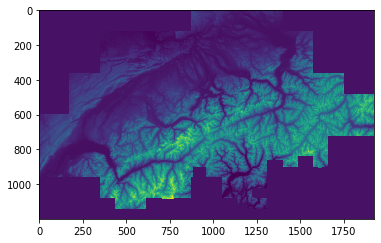

In [29]:
i = plt.imshow(img, interpolation='none');

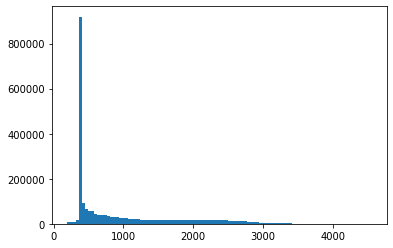

In [30]:
plt.hist(img.flatten(), 100);

In [31]:
data_json = plotar.surfacevr(img, x=xvec, y=yvec, return_data=True)

In [32]:
with open('examples/CH-full.json', 'w') as f:
    json.dump(data_json, f)

## Planets

We visualize the position of the Planets in the solar system at some time using the skyfield package.

In [33]:
from skyfield.api import Loader

In [34]:
load = Loader("./tmp/")

In [35]:
ts = load.timescale()
t = ts.utc(2021, 2, 26, 15, 19)

**Note:** on mybinder.org unfortunately ftp-downloads are blocked so this will run into a timeout. We are preparing a workaround.

In [36]:
planets = load('de421.bsp')  # ephemeris DE421

[#################################] 100% de421.bsp


In [37]:
planet_names = [ _[-1] for i,_ in planets.names().items() if 0 < i < 100 ]
print(len(planet_names))
planet_names

10


['MERCURY BARYCENTER',
 'VENUS BARYCENTER',
 'EARTH BARYCENTER',
 'MARS BARYCENTER',
 'JUPITER BARYCENTER',
 'SATURN BARYCENTER',
 'URANUS BARYCENTER',
 'NEPTUNE BARYCENTER',
 'PLUTO BARYCENTER',
 'SUN']

https://en.wikipedia.org/wiki/Planet

	Name	Equatorial
diameter [i]	Mass [i]	Semi-major axis (AU)	Orbital period
(years)	Inclination
to Sun's equator (°)	Orbital
eccentricity	Rotation period
(days)	Confirmed
moons	Axial tilt (°)	Rings	Atmosphere
1.	Mercury	0.383	0.06	0.39	0.24	3.38	0.206	58.65	0	0.10	no	minimal
2.	Venus	0.949	0.81	0.72	0.62	3.86	0.007	−243.02	0	177.30	no	CO2, N2
3.	Earth	1.000	1.00	1.00	1.00	7.25	0.017	1.00	1	23.44	no	N2, O2, Ar
4.	Mars	0.532	0.11	1.52	1.88	5.65	0.093	1.03	2	25.19	no	CO2, N2, Ar
5.	Jupiter	11.209	317.83	5.20	11.86	6.09	0.048	0.41	79	3.12	yes	H2, He
6.	Saturn	9.449	95.16	9.54	29.45	5.51	0.054	0.44	82	26.73	yes	H2, He
7.	Uranus	4.007	14.54	19.19	84.02	6.48	0.047	−0.72	27	97.86	yes	H2, He, CH4
8.	Neptune	3.883	17.15	30.07	164.79	6.43	0.009	0.67	14	29.60	yes	H2, He, CH4j

In [38]:
planet_sizes = {
'Mercury': '0.383',
'Venus': '0.949',
'Earth': '1.000',
'Mars': '0.532',
'Jupiter': '11.20',
'Saturn': '9.449',
'Uranus': '4.007',
'Neptune': '3.883',
}

In [39]:
planets_xyz = np.array([planets[_].at(t).ecliptic_xyz().au for _ in planet_names ])

In [40]:
data = plotar.plotar(planets_xyz, #col=planet_names, label=np.array(planet_names),
              return_data=True)

In [41]:
with open('examples/planets.json', 'w') as f:
    json.dump(data, f)